In [1]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.stats import sem

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "data/mouse_drug_data.csv"
clinical_trial_data_to_load = "data/clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_data = pd.read_csv("data/mouse_drug_data.csv")
drug_data = pd.read_csv("data/clinicaltrial_data.csv")

# Combine the data into a single dataset
combine_df =pd.merge(drug_data, mouse_data, on="Mouse ID")

# Display the data table for preview

combine_df.head()
#drug_data
#mouse_data



,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin


## Tumor Response to Treatment

In [2]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint

#tumor = combine_df.loc[combine_df["Drug"] == "Stelasyn"]
#print(tumor)
#tumor_data = tumor_data.groupby(["Drug"]).mean()
#tumor_data = tumor.groupby(["Timepoint"]).mean()
#tumorVOL_df = pd.DataFrame(tumor_data)


tumor_data = combine_df.groupby(["Drug", "Timepoint"])["Tumor Volume (mm3)"].mean()
tumorVOL_df = pd.DataFrame(tumor_data)
tumorVOL_df = tumorVOL_df.reset_index()
mean_pivot = tumorVOL_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
#print(tumor_data)

#tumorVOL_df


#plt.scatter(tumorVOL_df["Timepoint"], tumorVOL_df["Tumor Volume (mm3)"])
#plt.xlabel("Timepoint")
#plt.ylabel("Tumor Volume")
#plt.title("Tumor Response of Naftisol")
#plt.show()

uniques = tumorVOL_df["Drug"].unique()
print(uniques)
tumorVOL_df

['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


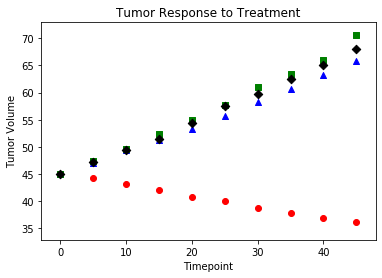

In [3]:
colors = ["red", "yellow", "blue", "green", "orange", "black", "cyan", "purple", "grey", "brown"]
alpha_list = ["1", "0", "1", "1", "0", "1", "0", "0", "0", "0"]
alphaInt_list = [.5, 0, .5, .5, 0, .5, 0, 0, 0, 0]
marker_list = ["o",".","^","s",".","D",".",".",".","."]
dfList = []
count = 0


for drug in uniques:
    newDf = tumorVOL_df.loc[tumorVOL_df["Drug"]==drug]
    dfList.append(newDf)
    #print(tumorVOL_df["Drug"])

    
for df in dfList:
    plt.scatter(dfList[count]["Timepoint"], dfList[count]["Tumor Volume (mm3)"], 
                marker=marker_list[count], color=colors[count], alpha=alpha_list[count])
    count +=1
    
plt.xlabel("Timepoint")
plt.ylabel("Tumor Volume")
plt.title("Tumor Response to Treatment")


plt.show()

In [4]:
print(dfList.index)
print(dfList[0].index)
print(dfList[0].columns)
print(dfList)


<built-in method index of list object at 0x000001BB4E3AB388>
Int64Index([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype='int64')
Index(['Drug', 'Timepoint', 'Tumor Volume (mm3)'], dtype='object')
[        Drug  Timepoint  Tumor Volume (mm3)
0  Capomulin          0           45.000000
1  Capomulin          5           44.266086
2  Capomulin         10           43.084291
3  Capomulin         15           42.064317
4  Capomulin         20           40.716325
5  Capomulin         25           39.939528
6  Capomulin         30           38.769339
7  Capomulin         35           37.816839
8  Capomulin         40           36.958001
9  Capomulin         45           36.236114,         Drug  Timepoint  Tumor Volume (mm3)
10  Ceftamin          0           45.000000
11  Ceftamin          5           46.503051
12  Ceftamin         10           48.285125
13  Ceftamin         15           50.094055
14  Ceftamin         20           52.157049
15  Ceftamin         25           54.287674
16  Ceftamin        

In [5]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
tumorError = combine_df.groupby(["Drug", "Timepoint"]).sem()["Tumor Volume (mm3)"]

# Convert to DataFrame
tumorError_df = pd.DataFrame(tumorError)
#tumorError_df = tumorError_df.rename(columns= {'Tumor Volume (mm3)':'Standard Error (Tumor Volume)'})

# Preview DataFrame

print(tumorError_df.columns)
tumorError_df.reset_index()

Index(['Tumor Volume (mm3)'], dtype='object')


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731
...,...,...,...
95,Zoniferol,25,0.602513
96,Zoniferol,30,0.800043
97,Zoniferol,35,0.881426
98,Zoniferol,40,0.998515


In [6]:
errorDF = tumorError_df.reset_index()
errorDF = errorDF.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]
errorDF

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.448593,0.164505,0.235102,0.264819,0.202385,0.218091,0.231708,0.482955,0.239862,0.188950
10,0.702684,0.236144,0.282346,0.357421,0.319415,0.402064,0.376195,0.720225,0.433678,0.263949
15,0.838617,0.332053,0.357705,0.580268,0.444378,0.614461,0.466109,0.770432,0.493261,0.370544
20,0.909731,0.359482,0.476210,0.726484,0.595260,0.839609,0.555181,0.786199,0.621889,0.533182
25,0.881642,0.439356,0.550315,0.755413,0.813706,1.034872,0.577401,0.746991,0.741922,0.602513
30,0.934460,0.490620,0.631061,0.934121,0.975496,1.218231,0.746045,0.864906,0.899548,0.800043
35,1.052241,0.692248,0.984155,1.127867,1.013769,1.287481,1.084929,0.967433,1.003186,0.881426
40,1.223608,0.708505,1.055220,1.158449,1.118567,1.370634,1.564779,1.128445,1.410435,0.998515


Drug       Capomulin   Ceftamin  Infubinol   Ketapril   Naftisol    Placebo  \
Timepoint                                                                     
0          45.000000  45.000000  45.000000  45.000000  45.000000  45.000000   
5          44.266086  46.503051  47.062001  47.389175  46.796098  47.125589   
10         43.084291  48.285125  49.403909  49.582269  48.694210  49.423329   
15         42.064317  50.094055  51.296397  52.399974  50.933018  51.359742   
20         40.716325  52.157049  53.197691  54.920935  53.644087  54.364417   
25         39.939528  54.287674  55.715252  57.678982  56.731968  57.482574   
30         38.769339  56.769517  58.299397  60.994507  59.559509  59.809063   
35         37.816839  58.827548  60.742461  63.371686  62.685087  62.420615   
40         36.958001  61.467895  63.162824  66.068580  65.600754  65.052675   
45         36.236114  64.132421  65.755562  70.662958  69.265506  68.084082   

Drug        Propriva   Ramicane   Stelasyn  Zonifer

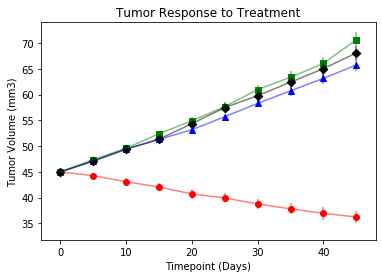

In [7]:
# Minor Data Munging to Re-Format the Data Frames

mean_pivot = tumorVOL_df.pivot(index="Timepoint", columns="Drug")["Tumor Volume (mm3)"]

print(mean_pivot)

count = 0

for df in dfList:
    plt.scatter(dfList[count]["Timepoint"], dfList[count]["Tumor Volume (mm3)"], marker=marker_list[count], 
                color=colors[count], alpha=alpha_list[count])
    plt.errorbar(errorDF.index, mean_pivot[uniques[count]], yerr=errorDF[uniques[count]], color=colors[count], 
                 alpha=alphaInt_list[count])
    count +=1
    
plt.xlabel("Timepoint (Days)")
plt.ylabel("Tumor Volume (mm3)")
plt.title("Tumor Response to Treatment")


plt.show()
# Preview that Reformatting worked


In [8]:
combine_df

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.000000,0,Capomulin
1,b128,5,45.651331,0,Capomulin
2,b128,10,43.270852,0,Capomulin
3,b128,15,43.784893,0,Capomulin
4,b128,20,42.731552,0,Capomulin
...,...,...,...,...,...
1901,m601,25,33.118756,1,Capomulin
1902,m601,30,31.758275,1,Capomulin
1903,m601,35,30.834357,1,Capomulin
1904,m601,40,31.378045,1,Capomulin


![Tumor Response to Treatment](../Images/treatment.png)

## Metastatic Response to Treatment

In [9]:
capomulin_info = combine_df.loc[combine_df["Drug"] == "Capomulin"]
capomulin_info = capomulin_info.mean()["Metastatic Sites"]
capomulin_df = pd.DataFrame(capomulin_info)
#ouse_info = capomulin_info.loc[capomulin_info["Mouse ID"] == "b128"]
plt.scatter(capomulin_df["Timepoint"], capomulin_df["Metastatic Sites"])
plt.xlabel("x")
plt.ylabel("y")
plt.title("title")
print(capomulin_info)
plt.show()

ValueError: DataFrame constructor not properly called!

In [10]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint
metastatic_data = combine_df.groupby(["Drug", "Timepoint"]).mean()["Metastatic Sites"]

# Convert to DataFrame
metastatic_dataDF = pd.DataFrame(metastatic_data)
metastatic_dataDF = metastatic_dataDF.reset_index()
metastatic_dataDF = metastatic_dataDF.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview DataFrame
#print(metastatic_dataDF.index)
print(metastatic_dataDF.columns)
met_uniques = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']

#metastatic_dataDF["Drug"]


#print(tumor_data)

tumorVOL_df


#plt.scatter(tumorVOL_df["Timepoint"], tumorVOL_df["Tumor Volume (mm3)"])
#plt.xlabel("Timepoint")
#plt.ylabel("Tumor Volume")
#plt.title("Tumor Response of Naftisol")
#plt.show()



Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')


,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325
...,...,...,...
95,Zoniferol,25,55.432935
96,Zoniferol,30,57.713531
97,Zoniferol,35,60.089372
98,Zoniferol,40,62.916692


In [11]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
metastaticError = combine_df.groupby(["Drug", "Timepoint"]).sem()["Metastatic Sites"]
# Convert to DataFrame
metastaticError_df = pd.DataFrame(metastaticError)
# Preview DataFrame
metastaticError_df

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621
...                               ...
Zoniferol 25                 0.236621
          30                 0.248168
          35                 0.285714
          40                 0.299791
          45                 0.286400

[100 rows x 1 columns]

In [13]:
# Minor Data Munging to Re-Format the Data Frames
metastaticError_df = metastaticError_df.reset_index()
metastaticError_df = metastaticError_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]
# Preview that Reformatting worked


KeyError: "None of ['Drug'] are in the columns"

In [14]:
print(uniques)
print("-------------------------------")
print(metastatic_dataDF.index)
print(metastatic_dataDF.columns)
#metastatic_dataDF.unstack()
metastatic_dataDF.head(3)

['Capomulin' 'Ceftamin' 'Infubinol' 'Ketapril' 'Naftisol' 'Placebo'
 'Propriva' 'Ramicane' 'Stelasyn' 'Zoniferol']
-------------------------------
Int64Index([0, 5, 10, 15, 20, 25, 30, 35, 40, 45], dtype='int64', name='Timepoint')
Index(['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo',
       'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.00,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.00,0.000000,0.000000
5,0.16,0.380952,0.280000,0.304348,0.26087,0.375000,0.320000,0.12,0.240000,0.166667
10,0.32,0.600000,0.666667,0.590909,0.52381,0.833333,0.565217,0.25,0.478261,0.500000


In [15]:
print(metastaticError_df.index)
print(metastaticError_df.columns)
metastaticError_df.head(3)

RangeIndex(start=0, stop=10, step=1)
Index(['Timepoint', 'Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril',
       'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol'],
      dtype='object', name='Drug')


Drug,Timepoint,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
0,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
2,10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109


In [16]:
met_dfList = []
met_count = 0

met_dfList.append(metastaticError_df.loc(0))
met_dfList.append(metastaticError_df.loc(1))
#met_dfList.append(metastaticError_df.loc(2))
#met_dfList.append(metastaticError_df.loc(3))

print(met_dfList)

[<pandas.core.indexing._LocIndexer object at 0x000001BB4FA0D2C8>, <pandas.core.indexing._LocIndexer object at 0x000001BB4FA0D318>]


In [ ]:




# Generate the Plot (with Error Bars)
#metastaticError_df = metastaticError_df.pivot(index="Timepoint", columns="Drug")["Metastatic Sites"]




met_dfList = []
met_count = 0


#create 
for i in met_uniques:
    print(drug)
    new_metDf = metastatic_dataDF.loc[met_uniques[met_count]]
    met_dfList.append(new_metDf)
    met_count +=1
    
print(met_dfList)

#met_count2 = 0

#for df in dfList:
    #plt.scatter(met_dfList[met_count2]["Timepoint"], met_dfList[met_count2]["Tumor Volume (mm3)"], marker=marker_list[met_count2], color=colors[met_count2], 
                #alpha=alpha_list[met_count2])
  #  plt.scatter(metastaticError_df.index, met_dfList[met_count2]["Tumor Volume (mm3)"], marker=marker_list[met_count2], 
               # color=colors[met_count2], alpha=alpha_list[met_count2])
 #   plt.errorbar(metastaticError_df.index, mean_pivot[uniques[met_count2]], yerr=metastaticError_df[uniques[met_count2]], 
                # color=colors[met_count2], alpha=alphaInt_list[met_count2])
 #   met_count2 +=1
    
#plt.xlabel("Treatment Duration (Days)")
#plt.ylabel("Met. Sites")
#plt.title("Metastatic Spread During Treatment")


#plt.show()



# Save the Figure

# Show the Figure


![Metastatic Spread During Treatment](../Images/spread.png)

## Survival Rates

In [ ]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)

# Convert to DataFrame

# Preview DataFrame


In [ ]:
# Minor Data Munging to Re-Format the Data Frames

# Preview the Data Frame


In [ ]:
# Generate the Plot (Accounting for percentages)

# Save the Figure

# Show the Figure
plt.show()

![Metastatic Spread During Treatment](../Images/survival.png)

## Summary Bar Graph

In [ ]:
# Calculate the percent changes for each drug

# Display the data to confirm


In [ ]:
# Store all Relevant Percent Changes into a Tuple


# Splice the data between passing and failing drugs


# Orient widths. Add labels, tick marks, etc. 


# Use functions to label the percentages of changes


# Call functions to implement the function calls


# Save the Figure


# Show the Figure
fig.show()

![Metastatic Spread During Treatment](../Images/change.png)